### RNN : Recurrent Neural Network

Performs the same operation on the i/p data. And the o/p depends on the previous o/p and that  is called a `hidden state (Memory of recurrent neural network)`. And the process repeats. This approach for processing the data is known as ***FEED FORWARD APPROACH/ PROPOGARTION***

Suppose we have 1 neuron, and we pass data (x) to it. RNN is going to process the data and generate the o/p i.e a hidden state and given to the next data say x1.
- f($h_t-1$ , x1)


$h_t$ = tanh(weight * $h_t$ - 1 + weight * $x_t$)

tanh -> activation func

h -> previous o/p
x -> Current o/p

##### Drawback

- ***Gradient Vanishing Problem*** 
because of the gradeint is small

weight = weight - learningrate (gradient/residual)
if the gradient is very small suppose 0.0001 and weight is 0.56, so hence the difference will be same... ie  0.56 - 0.0001, then the new weight will be 0.56 itself and again the new weight will be the same ie 0.56 and hence the next layer stop's learning.

- ***Short Memory Problem.***
RNN works best on sequential data. Suppose we give a long sequential data, so to carry on thi information, it's going to be hard for the RNN for every propogation. To the next layer, previous hidden State data is given which is very long then the next layer can't learn sometimes

### LSTM 

In LSTM it only remembers the important parts of the data.

- tanh -> converts the data in range of -1 to 1.
- sigmoid -> converts the data in range of 0 to 1.
    - 0 - not important
    - 1 - important

##### Structure of LSTM

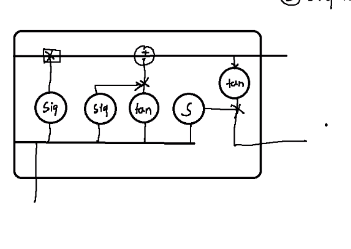


##### Gates in LSTM

- Forget Gate 
    - In forget gate, sigmoid function is used. If the value is 0, then it's forgotten by the LSTM model. And hence all the important important data is remembered by the model. 
- Cell State 
- Input Gate
- Output Gate

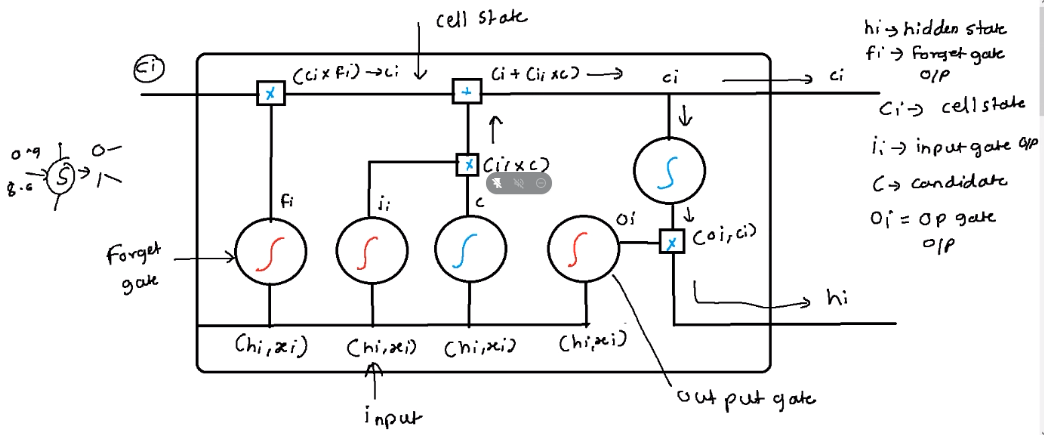

### Steps

- hidden state and current state input is combined. 
    - ($h_i$, $x_i$)
    
- ($h_i$, $x_i$) is fed to the forget gate. It removes the non important data.

- ($h_i$, $x_i$) is given to the candidate layer and also ($h_i$, $x_i$) is given to the input gate

- Output of candidate layer(tanh()) is multiplied wwith input layer's output. This decides what data should be added to the cell state. 

- The Cell State is calculated. 

- ($h_i$, $x_i$) is given to the output layer. 

- Output layer -> $o_i$ is multiplied with the cell state ($c_i$) to give new hidden state

### Activation Functions / Transfer Functions

- Linear $f^n$ -> -infinity, infinity
- Sigmoid  $f^n$ -> 0,1
- tanh $f^n$ -> -1,1
- Relu - Rectified Linear Unit $f^n$  -> 0, infinity
    - f(z)  = max(0,z)
- elu $f^n$
- selu $f^n$
- softmax $f^n$
- softplus $f^n$
- sortsian $f^n$
- hard sigmoid $f^n$
- exponential $f^n$

#### Layers
- Dense Layer
- Dropout Layer
- Flatten Layer
- Reshape Layer
- Permute Layer
- Repeated Vector Layer
- Lambda Layer
- Convulation Layer
- Pooling Layer

pip install keras

pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("iap.csv",parse_dates=["Month"],index_col="Month")

In [3]:
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [6]:
df.rename(columns = {"International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60":"Total_Passengers"}, inplace = True)

In [7]:
df.head()

,Total_Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


<AxesSubplot:xlabel='Month'>

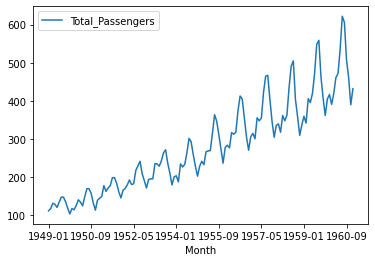

In [8]:
df.plot()

In [9]:
df.shape

(145, 1)

In [10]:
size=int(df.shape[0]*0.8)
size

116

In [11]:
train=df.iloc[:size]
train.shape

(116, 1)

In [12]:
test=df.iloc[size:]
test.shape

(29, 1)

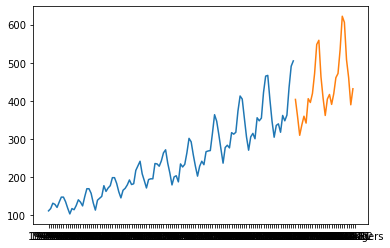

In [13]:
plt.plot(train)
plt.plot(test)

In [14]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
mx.fit(train)
sc_train=mx.transform(train)
sc_test=mx.transform(test)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

lstm_model=Sequential()
lstm_model.add(LSTM(200,activation='relu',input_shape=(10,1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse')

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras.preprocessing.sequence import TimeseriesGenerator
gen=TimeseriesGenerator(sc_train,sc_train,length=10,batch_size=1)

In [18]:
lstm_model.fit_generator(gen,epochs=20)

C:\Users\tejas\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
106/106 [==============================] - 3s 8ms/step - loss: 0.0380
Epoch 2/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0194
Epoch 3/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0142
Epoch 4/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0193
Epoch 5/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0129
Epoch 6/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0156
Epoch 7/20
106/106 [==============================] - 1s 6ms/step - loss: 0.0097
Epoch 8/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0112
Epoch 9/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0104
Epoch 10/20
106/106 [==============================] - 1s 8ms/step - loss: 0.0092A: 0s -
Epoch 11/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0100
Epoch 12/20
106/106 [==============================] - 1s 7ms/step - loss: 0.0093
Epoch 13/20
106/10

([<matplotlib.axis.XTick at 0x1140574b310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

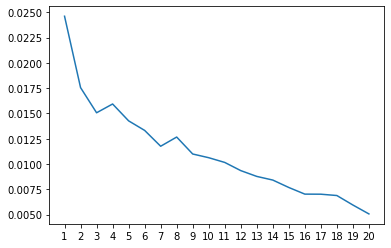

In [19]:
loss=lstm_model.history.history["loss"]
plt.plot(range(1,len(loss)+1),loss)
plt.xticks(range(1,len(loss)+1))

In [20]:
pred = []

batch = sc_train[-10:]
current_batch = batch.reshape((1, 10, 1))

for i in range(len(test)):   
    tpred = lstm_model.predict(current_batch)[0]
    pred.append(tpred) 
    current_batch = np.append(current_batch[:,1:,:],[[tpred]],axis=1)

In [21]:
pred

[array([0.8167155], dtype=float32),
 array([0.6815423], dtype=float32),
 array([0.55537677], dtype=float32),
 array([0.45428282], dtype=float32),
 array([0.40073276], dtype=float32),
 array([0.35930705], dtype=float32),
 array([0.34427875], dtype=float32),
 array([0.33710378], dtype=float32),
 array([0.33611125], dtype=float32),
 array([0.35063738], dtype=float32),
 array([0.38416153], dtype=float32),
 array([0.40471703], dtype=float32),
 array([0.41431957], dtype=float32),
 array([0.41455317], dtype=float32),
 array([0.40584022], dtype=float32),
 array([0.38946474], dtype=float32),
 array([0.37364644], dtype=float32),
 array([0.36010474], dtype=float32),
 array([0.3507048], dtype=float32),
 array([0.34849757], dtype=float32),
 array([0.35452598], dtype=float32),
 array([0.36224443], dtype=float32),
 array([0.36975265], dtype=float32),
 array([0.3758157], dtype=float32),
 array([0.3790456], dtype=float32),
 array([0.3780921], dtype=float32),
 array([0.37382364], dtype=float32),
 array(

In [22]:
lstm_predictions = mx.inverse_transform(pred)
lstm_predictions

array([[431.50290704],
       [377.29845321],
       [326.70608401],
       [286.16741091],
       [264.69383502],
       [248.08212733],
       [242.05577987],
       [239.17861742],
       [238.78061026],
       [244.6055879 ],
       [258.0487743 ],
       [266.29152828],
       [270.14214951],
       [270.23581934],
       [266.74192744],
       [260.17535913],
       [253.83222169],
       [248.40200061],
       [244.63262045],
       [243.74752539],
       [246.16491932],
       [249.26001531],
       [252.27081084],
       [254.70209152],
       [255.99728787],
       [255.61493617],
       [253.90328074],
       [251.38291931],
       [248.68669093]])

In [27]:
test_df=test
test_df["LSTM_Predictions"] = lstm_predictions
test_df.head()

<ipython-input-27-4a6fd24c9614>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["LSTM_Predictions"] = lstm_predictions


,Total_Passengers,LSTM_Predictions
Month,,
1958-09,404.0,431.502907
1958-10,359.0,377.298453
1958-11,310.0,326.706084
1958-12,337.0,286.167411
1959-01,360.0,264.693835


<AxesSubplot:xlabel='Month'>

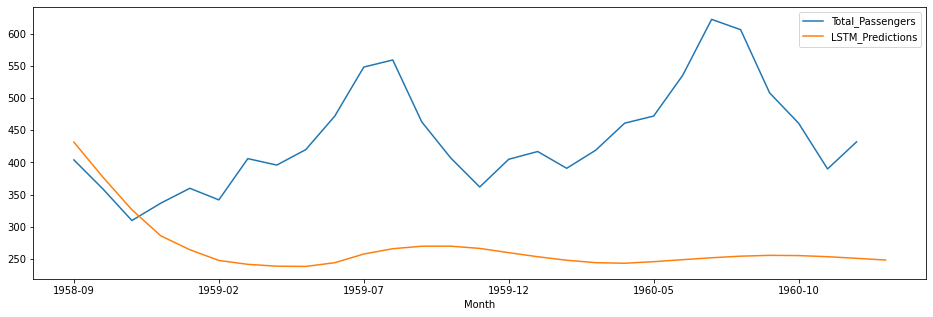

In [28]:
test_df["Total_Passengers"].plot(figsize = (16,5), legend=True)
test_df["LSTM_Predictions"].plot(legend = True)